# Setting up your environment


## Google Colab
PyTorch is already installed and ready to be used on Google Colab. <br>
By default all Colab notebooks will use the CPU for computation, unless switched to a GPU Runtime.<br> For this tutorial you will only use the CPU Runtime

## Local Runtime
Alternatively, if you want to run PyTorch on your local machine, you can install it using the following steps.
<br>
1. It is a good idea to install PyTorch and it's prerequisite libraries within an Anaconda Environment (virtual Python environemt) <br>Install Anaconda using the official Anaconda Guide- <br>
Windows-https://docs.anaconda.com/free/anaconda/install/windows/
<br>Linux - https://docs.anaconda.com/free/anaconda/install/linux/
<br> MacOS - https://docs.anaconda.com/free/anaconda/install/mac-os/

2. Create a virtual environment (don't include the angular brackets <>)
  <br> ```conda create -n <torch-cpu> python=3.10```
3. Install PyTorch<br>
  Refer to this guide- https://pytorch.org/get-started/locally/ <br>
  Install the CPU version <br>
  <br>

# Iris Dataset
### Prepared by Ram Selvaraj
## Problem Statement-
Classification of the Iris Dataset.
<br> The dataset consists of the length and width properties of the sepals and petals of 180 samples of the Iris flower, along with the labels corresponding to their sub-species.
## Description-
The task at hand is to use a neural network to classify what sub species the flower belongs to, based on its sepal and petal properties <br>
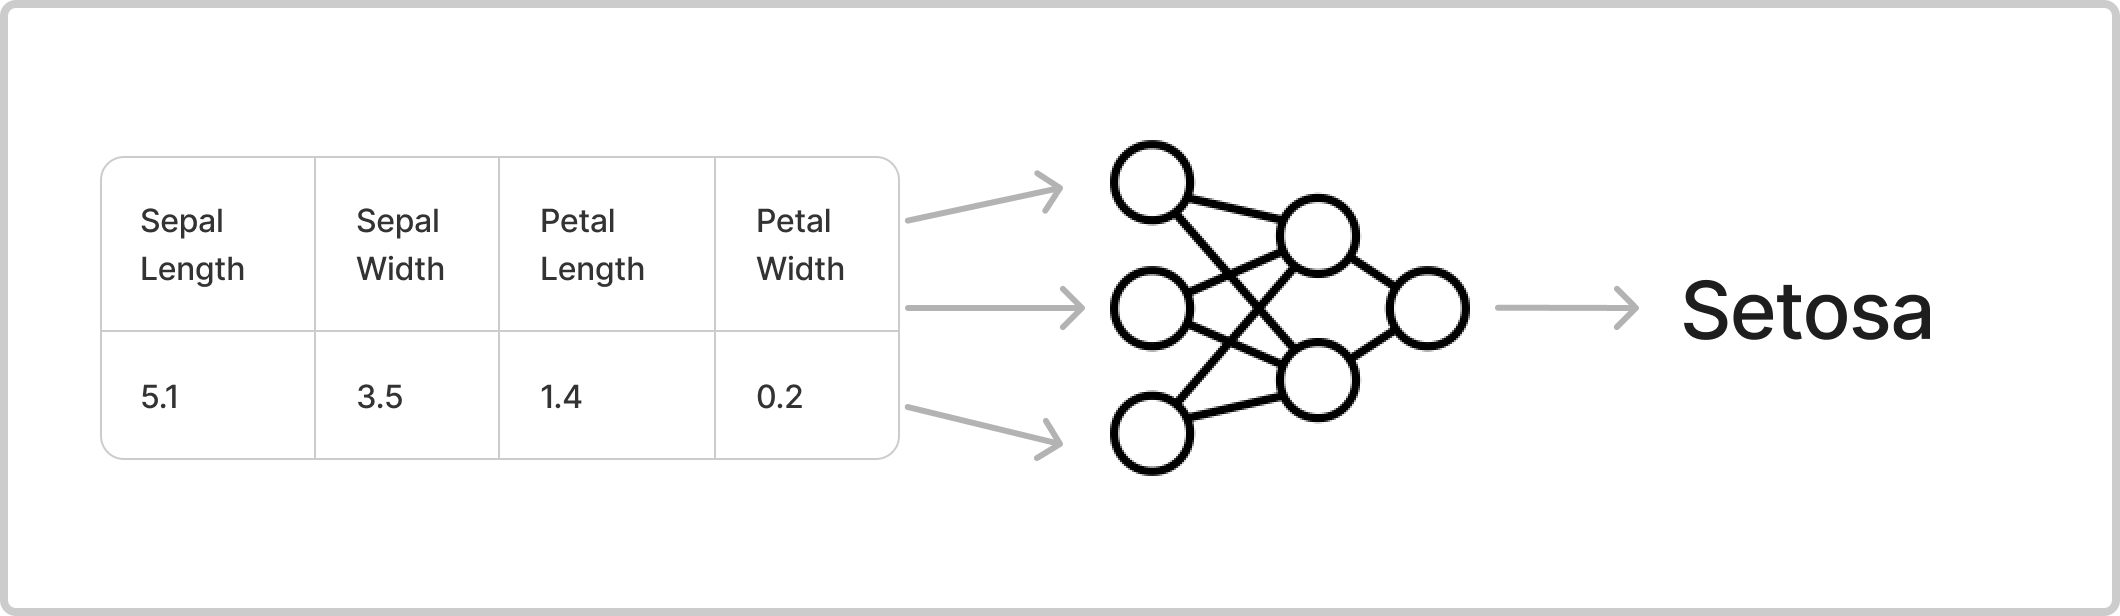

# Imports

In [14]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch                     # main PyTorch import

Looking in indexes: https://download.pytorch.org/whl/cu118


# Downloading, Visualising and Loading the IRIS Dataset
For this tutorial, you will be using the Iris Dataset
<br>
You will be loading the dataset from the csv file using pandas, and converting it to a PyTorch dataset.

In [15]:
# !pip install wget
# !wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
!curl -O https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3975  100  3975    0     0  82994      0 --:--:-- --:--:-- --:--:-- 84574


In [16]:
%pip install pandas
import os
# os.chdir('./week1')
import pandas as pd
df = pd.read_csv('./iris.csv')
df.head()

Note: you may need to restart the kernel to use updated packages.


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [17]:
classes = df.variety.unique()
dc = dict(zip([0,1,2], classes))
dc

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

## Creating a target variable
Since the original dataset has the `variety` as string data, we need to convert it to a numerical value before we can convert it to a Pytorch tensor.
<br> To do this, you can use the `factorize` command, and assign it to a new a column called `target`, which will hold the the numeric value of that class, as seen in the dictionary above.

In [18]:
df['target'] = pd.factorize(df['variety'])[0]
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


## Split the Dataset into Train and Test sets

In [19]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['variety','target'],axis=1), df.iloc[:,5], test_size=0.2)

Note: you may need to restart the kernel to use updated packages.


## Number of Samples

In [20]:
print("Number of training instances: ",len(X_train))
print("Number of testing samples:     ", len(X_test))

Number of training instances:  120
Number of testing samples:      30


## Converting into PyTorch `Dataset`
- this is done by inheriting the `Dataset` base class
  - `init` function allows us to define the data we take in while initialising an instance of this dataset (train and test)
  - `len` function should return the number of samples
  - `getitem` should return the exact data required for each and every sample, in other words you will access 1 sample in the data using the provided `idx` index, in this case, you want the input and corresponding target

In [21]:
import torch
from torch.utils.data import Dataset

class irisPyTorchDataset(Dataset):
  def __init__(self,X_values, y_values):
    self.X_values = X_values
    self.y_values = y_values
  def __len__(self):
    return len(self.X_values)
  def __getitem__(self,idx):
    X_tensors=torch.FloatTensor(self.X_values.iloc[idx,:])
    y_tensors=torch.tensor(self.y_values.values[idx])
    return X_tensors, y_tensors


Initialise the objects

In [22]:
train_data = irisPyTorchDataset(X_train,y_train)
test_data = irisPyTorchDataset(X_test,y_test)

## Loading with `DataLoader`

In [23]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(train_data, batch_size = 1, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=1, shuffle=True)

Additioanlly for your convenience, you can use a dictionary to store and access them

In [24]:
loaders = {'train': loaded_train,
           'test': loaded_test}

## Number of training batches

In [25]:
print("Number of training batches: ",len(loaders['train']))
print("Number of testing batches: ",len(loaders['test']))

Number of training batches:  120
Number of testing batches:  30


There are 120 batches
- 120 batches with batch size 1

# Building the Neural Network
With the Dataset now ready, we can start working on the Neural Network itself.
<br>
You will be building the following network- <br>
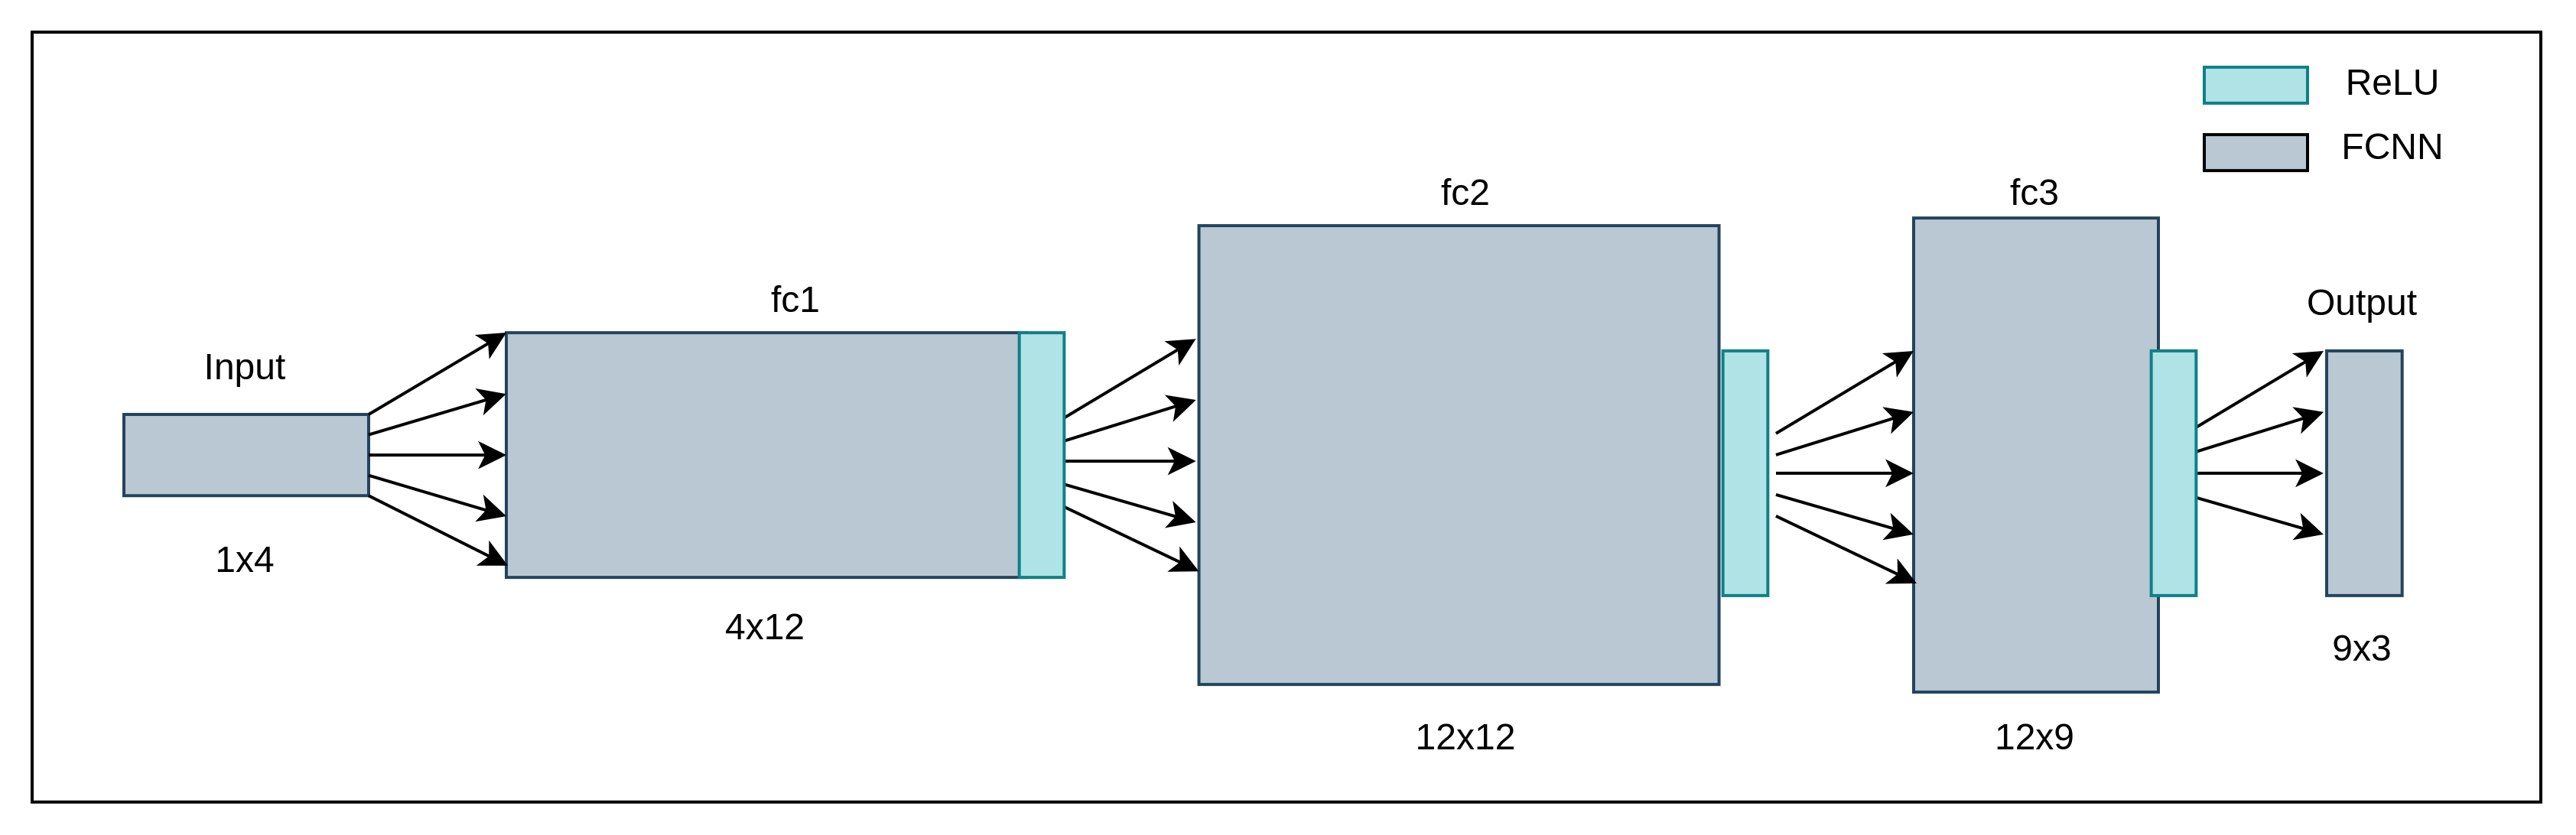
<br>
<!-- There are a mulitude of ways PyTorch allows you to build out your network, for this example you will be building the network using a mixture of different approaches, and usually considered best practice.

### 1) How to start off building the network?
You must start off building your network by inheriting the main PyTorch ```nn.module``` class.
This is the PyTorch base class meant to encapsulate behaviours specific to PyTorch Models and their components.

### 2) What is the ```__init__``` function?
The `__init__` function is where you specify the layers of your network

### 3) What is the ```forward``` function?
The `forward` function is where you specify how the input to the network must propogate through the layers of the network. The output of the model is also mapped here as the return statement.
The data typically is propogated through the network by overwriting the variable with the new updated values as they pass through the layers. -->

In [26]:
from torch import nn
import torch.nn.functional as F

class IRIS_FCNN(nn.Module):
  def __init__(self):
    super(IRIS_FCNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(4, 12)
    self.fc2 = nn.Linear(12,12)
    self.fc3 = nn.Linear(12, 9)
    self.output = nn.Linear(9, 3)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.output(x)

    return x

`view` function - is used to flatten the tensors
### Why specifically these layers and activations are chosen?
The design of the network is entirely dependant on the task at hand, and this convolution neural network with the appropriate activations allows us to accurately predict for the task at hand.


## Initialise your Model

In [27]:
iris_fcnn = IRIS_FCNN()
print(iris_fcnn)

IRIS_FCNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)


## Define a Loss Function

In [28]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

## Define an Optimization Function
Define the required optimiser along with the desired learning rate.

In [29]:
from torch import optim
optimizer = optim.Adam(iris_fcnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

# Training the Network
Similar to the MNIST example, you need to define a `train` function

Again, PyTorch trains in batches, so the `id` will keep track of which batch of data you are working on.

**Keep in mind the number of batches is how many were set in the data loader in the previous section, which in this case is a batch for each training sample, i.e 120 batches of batch size 1**

In [30]:
def train(loaders,model, loss_func, optimizer):
  model.train()
  size = len(loaders['train'])
  for id, (X,y) in enumerate(loaders['train']):
    predicted_output = model(X)
    actual_output = y
    loss = loss_func(predicted_output, actual_output)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (id+1) % 100 == 0:
      loss, current = loss.item(),id
      print(f"Loss: {loss:>7f} \n Sample: [{current+1:>5d}/{size:>5d}]")

`model.train()` sets the model into 'training' mode. It is a mode that when enabled, PyTorch will perform training specific functions such as Dropout layers.
<br>
Running `model(X)` will run the input through the model and return a prediction.
<br> Running the chosen loss function will return the loss
<br> `optimizer.zero_grad()` will reset the gradients of the optimizer to zero for every batch
<br> `loss.backward` is where the back propogation happens. It keeps a history of the order of the layers and how the data propogated through, thus automatically able to calculate the gradient for every parameter in the network
<br> `optimizer.step()` will update the parameters based on the gradients calculated previously.

#### Calling the `train` function
With the `train` function defined, you can call it for how many ever epochs are required.


In [31]:
num_epochs = 30
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train(loaders, iris_fcnn, loss_func, optimizer)

Epoch 1
-------------------------------
Loss: 0.021691 
 Sample: [  100/  120]
Epoch 2
-------------------------------


C:\Users\theun\AppData\Local\Temp\ipykernel_12512\3061538638.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_tensors=torch.FloatTensor(self.X_values.iloc[idx,:])


Loss: 0.636635 
 Sample: [  100/  120]
Epoch 3
-------------------------------
Loss: 0.000183 
 Sample: [  100/  120]
Epoch 4
-------------------------------
Loss: 0.042335 
 Sample: [  100/  120]
Epoch 5
-------------------------------
Loss: 0.556498 
 Sample: [  100/  120]
Epoch 6
-------------------------------
Loss: 0.920532 
 Sample: [  100/  120]
Epoch 7
-------------------------------
Loss: 0.002686 
 Sample: [  100/  120]
Epoch 8
-------------------------------
Loss: 0.016256 
 Sample: [  100/  120]
Epoch 9
-------------------------------
Loss: 0.004059 
 Sample: [  100/  120]
Epoch 10
-------------------------------
Loss: 0.003353 
 Sample: [  100/  120]
Epoch 11
-------------------------------
Loss: 0.462323 
 Sample: [  100/  120]
Epoch 12
-------------------------------
Loss: 0.000571 
 Sample: [  100/  120]
Epoch 13
-------------------------------
Loss: 0.101482 
 Sample: [  100/  120]
Epoch 14
-------------------------------
Loss: 0.009305 
 Sample: [  100/  120]
Epoch 15

# Testing the Network
Similar to how you defined and ran the `train` function, you can define and run a `test` function.

This function is typically written to calculate the Accuracy along with the Loss.

To calculate the accuracy, you will have to compare the actual labels of your prediction and target itself.

Since the final layer was a Softmax activation, the output will be 10 class probabilities, with the highest probability being the predicted output.

You can extract this value with the `argmax()` function.

Keep in mind you will have to convert it to the appropriate datatypes

`model.eval()` sets the model into Evaluation/Inference mode, it is the opposite of `model.train()`.

In [32]:
def test(loaders, model, loss_func, optimizer):
  size = len(loaders['test'])
  test_loss, correct = 0,0
  model.eval()
  with torch.no_grad():
    for id,(X,y) in enumerate(loaders['test']):
      predicted_output = model(X)
      actual_output = y
      test_loss = loss_func(predicted_output, actual_output)
      correct += (predicted_output.argmax(dim = 1) == actual_output).type(torch.float).sum().item()

  test_loss /= size
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}")

In [33]:
test(loaders, iris_fcnn, loss_func, optimizer)

Test Error: 
 Accuracy: 100.0


C:\Users\theun\AppData\Local\Temp\ipykernel_12512\3061538638.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_tensors=torch.FloatTensor(self.X_values.iloc[idx,:])
